#### Imports

In [2]:
%pip install matplotlib
%pip install seaborn
%pip install mplcyberpunk
%pip install scikit-learn
%pip install pickle
%pip install regex

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

#### Review the Data

In [42]:
#opening the csv file and viewing the first 5 lines of the dataset
df = pd.read_csv("housing_price_dataset.csv")
df.head()


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [4]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


Below is the information about all the columns in the dataset. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


With 50,000 rows of data, there are no null values. 
The squarefeet, bedrooms, bathrooms, and yearbuilt are integer values.
The prices are floats and the neighborhood name is a string object.

array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

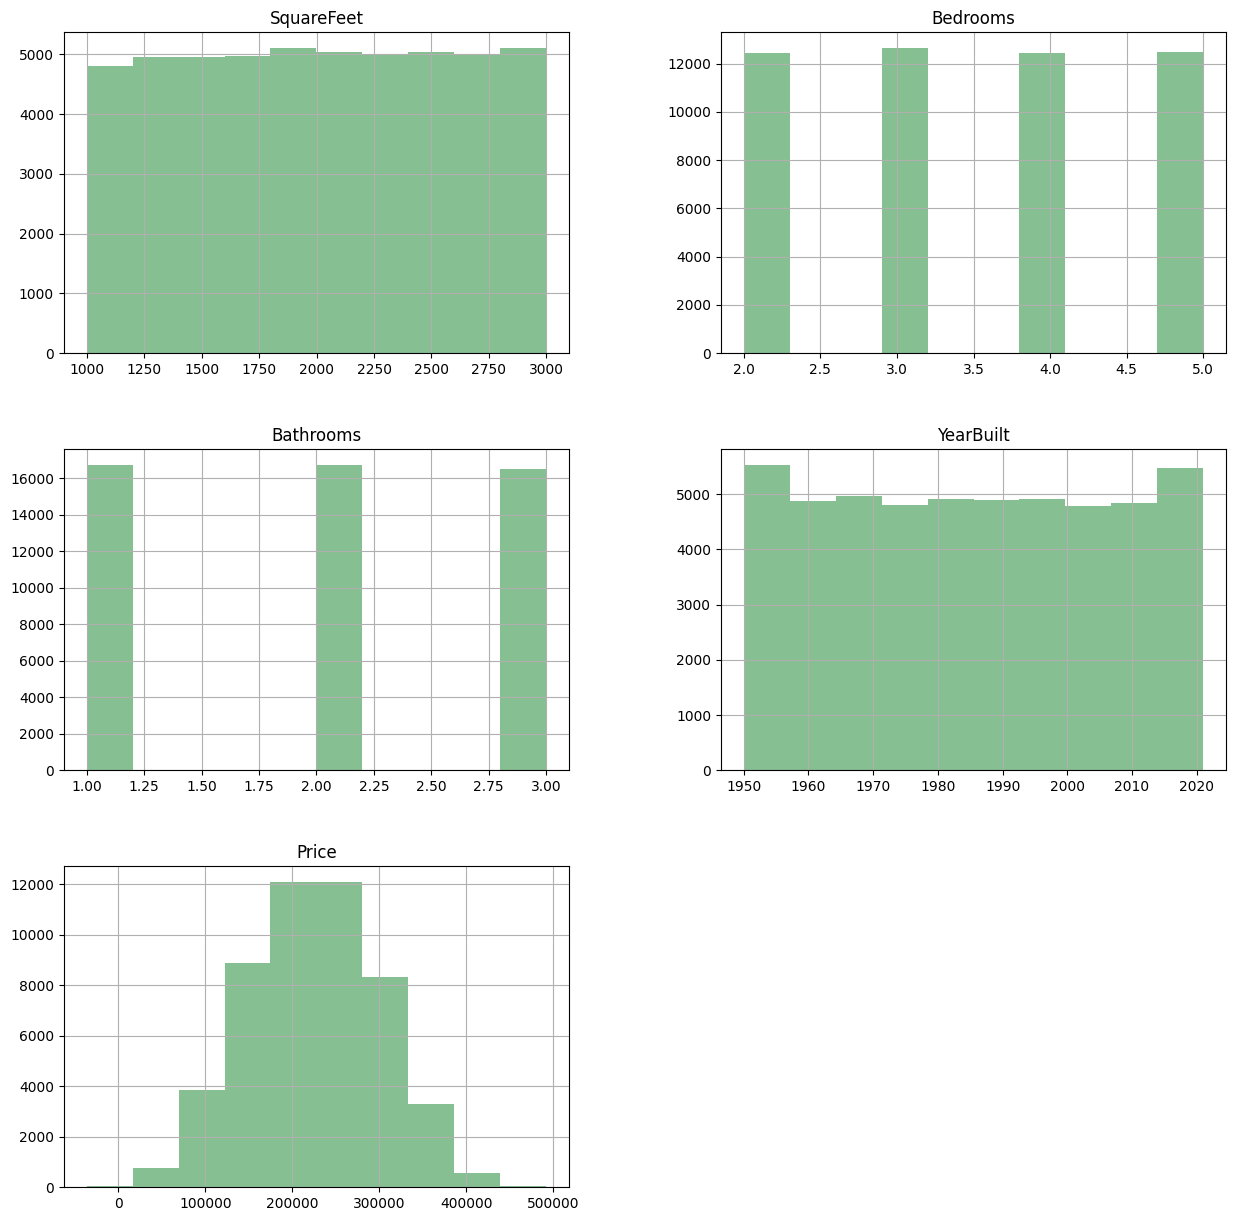

In [6]:
df.hist(
  figsize=(15,15),
  color='#86bf91',
)

#### Average Price per Home

In [5]:
# average price per neighborhood (rural, suburb, urban)
neighborhood_avg_price = df.groupby('Neighborhood')['Price'].mean()

# for loop that prints out the avg results
for neighborhood, avg_price in neighborhood_avg_price.items():
    print(f"Neighborhood: {neighborhood}, Average Price: ${avg_price:.2f}") 


Neighborhood: Rural, Average Price: $224096.13
Neighborhood: Suburb, Average Price: $223234.19
Neighborhood: Urban, Average Price: $227166.20


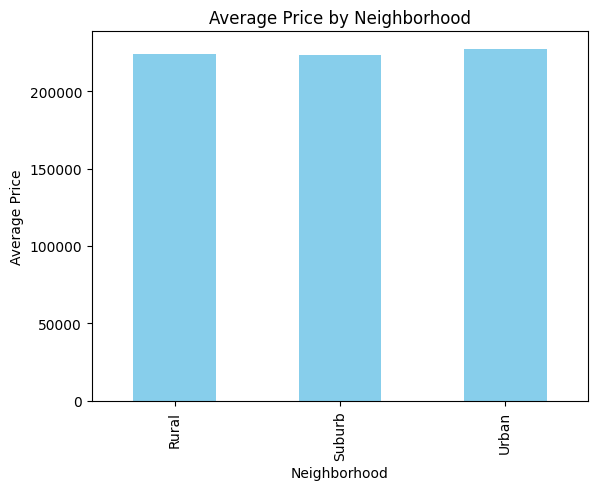

In [6]:
neighborhood_avg_price = df.groupby('Neighborhood')['Price'].median()

# Plotting the bar chart
neighborhood_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.show()

As noted the the figure above, there are no significant differences in the average price of homes regardless of neighborhood type (rural, suburb, and urban). As a result, this variable may be irrelevant to our prediction models, which will be investigated later.

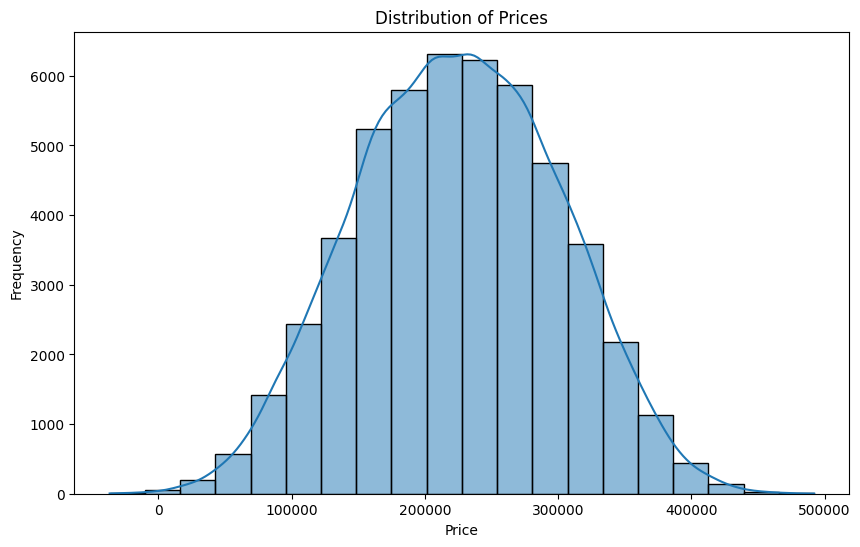

In [12]:

# price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=20)
plt.title("Distribution of House rices")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.savefig('price-dist.png')

plt.show()

The distribution model reveals that some of our datapoints for average price of homes are negative values, or less than 0. This is improbable, so we must go back and remove the negative data points and redo the redistribution tables.

In [19]:
df_price_sort = df.sort_values(by= 'Price', ascending=True)
df_finding_negatives = df_price_sort.head(22)
df_finding_negatives

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
33666,1013,5,2,Urban,1960,-36588.165397
17706,1080,5,1,Rural,1955,-28774.998022
1266,1024,2,2,Urban,2006,-24715.242482
8720,1235,3,1,Urban,1952,-24183.000515
5118,1140,4,1,Urban,2020,-23911.003119
3630,1235,3,2,Rural,2012,-19871.251146
20211,1049,3,1,Rural,2005,-18159.685676
6355,1016,5,2,Rural,1997,-13803.684059
9611,1131,3,3,Urban,1959,-13692.026068
4162,1352,5,2,Suburb,1977,-10608.359522


With the prices sorted from lowest to highest, we noticed there are negatives price floats. We will filter out the negative ones so we can only work with postive float values.

In [45]:
df = df[df.Price > 0]
df

cleaned_price_sort =  df.sort_values(by= 'Price', ascending=True)
cleaned_price_sort

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
40144,1006,2,1,Suburb,1973,154.779120
17216,1013,2,1,Suburb,2018,276.063516
36235,1112,3,1,Suburb,1978,2360.274450
29980,1005,3,3,Urban,1978,2697.849758
23662,1256,3,1,Rural,1978,3000.859614
...,...,...,...,...,...,...
21815,2998,3,2,Urban,1995,468493.877841
3784,2901,2,3,Urban,1996,470989.679074
26930,2995,5,2,Urban,1954,476671.733263
46610,2957,5,1,Suburb,2001,482577.163405


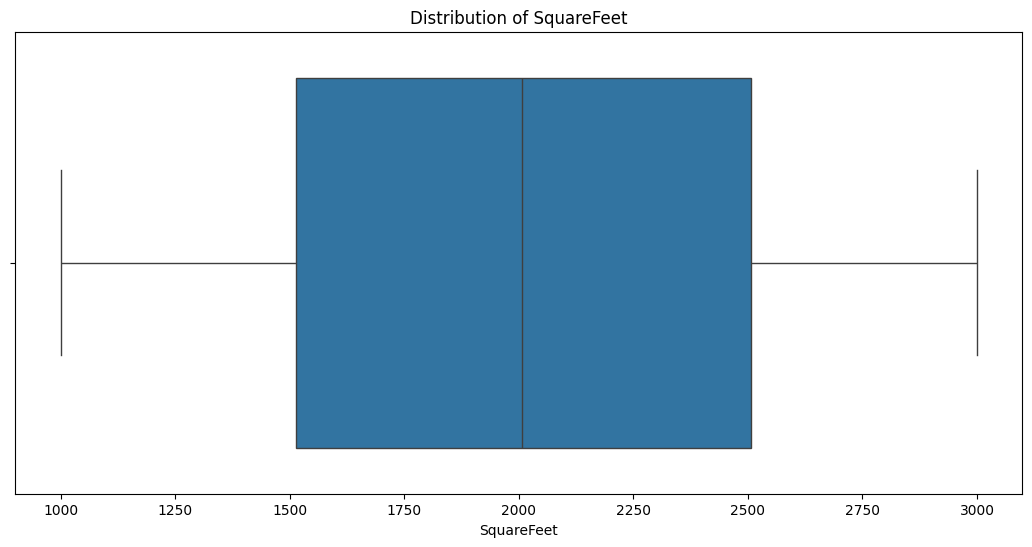

In [17]:
#Detecting outliers 
plt.figure(figsize=(13, 6))
sns.boxplot(x='SquareFeet', data=df)
plt.title('Distribution of SquareFeet')
plt.show()

Above is the distribution of square foot in the dataset. There are not significant outliers in the dataset. 

The median is 2000 square feet and the IQR rangess from 1500 to 2500.

#### Filtering the Dataset

We will filter out the dataset to work with rural neighborhoods. Below will only print out data for rural neighborrd homes.

In [19]:
neighborhood_filter = 'Rural'
rural_df = df[df['Neighborhood'] == neighborhood_filter]
rural_df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
7,2044,4,3,Rural,1957,184992.321268
16,2123,5,2,Rural,1956,190773.148563
19,1130,4,3,Rural,1962,143050.201782
...,...,...,...,...,...,...
49987,2237,4,1,Rural,2011,227359.621341
49992,1818,4,1,Rural,1983,163683.675434
49995,1282,5,3,Rural,1975,100080.865895
49998,2596,5,2,Rural,1984,380512.685957


In [22]:
rural_df = rural_df.sort_values(by='YearBuilt', ascending=True)
rural_df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
22024,2059,2,1,Rural,1950,190474.087259
21404,1330,2,3,Rural,1950,225675.232185
40108,1255,5,3,Rural,1950,242137.141780
31024,2137,5,2,Rural,1950,171603.207357
48670,2110,5,1,Rural,1950,305674.962992
...,...,...,...,...,...,...
41824,1192,4,1,Rural,2021,184293.602423
22867,2894,2,3,Rural,2021,330179.767708
43684,1893,5,1,Rural,2021,255425.903591
46665,1580,4,2,Rural,2021,191789.891924


In [23]:
rural_df = rural_df.sort_values(by='Price', ascending=True)
rural_df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
17706,1080,5,1,Rural,1955,-28774.998022
3630,1235,3,2,Rural,2012,-19871.251146
20211,1049,3,1,Rural,2005,-18159.685676
6355,1016,5,2,Rural,1997,-13803.684059
17442,1600,2,3,Rural,1989,-8238.884499
...,...,...,...,...,...,...
7276,2957,2,3,Rural,1989,452870.618989
3967,2931,5,1,Rural,1983,453551.125469
44311,2954,5,2,Rural,1960,456955.244541
3285,2985,5,1,Rural,1961,456959.804367
